# **Lab Exercise: Linear and Logistic Regression**

## **Linear Regression Construction** 

#### **Section 1: Setting Up and Importing Libraries**
*Objective:* Load the required `Python libraries`.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### **Section 2: Linear Regression Data Preparation**

*Objective:* Create a dataset for linear regression.

Task: Write the code to:

Create a dataset with features and target variables for linear regression.
Visualize the data using Matplotlib.


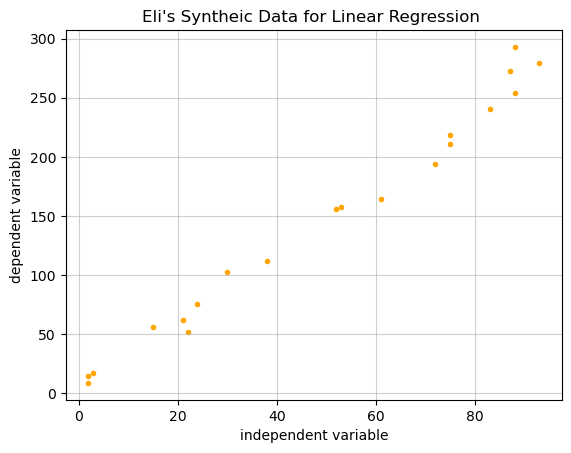

In [6]:
# Generate synthetic data for linear regression
np.random.seed(42)  # For reproducibility
X = np.random.randint(1, 100, 20)  # Features (independent variable)
y = 3 * X + 7 + np.random.normal(0, 15, 20)  # Target with noise

# Visualize the data

# You need to use scatter chart to Visualize the input dataset X & y
# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid

# Your code

%matplotlib inline
plt.xlabel('independent variable')
plt.ylabel('dependent variable')
plt.scatter(X,y,color='orange',marker='.')
plt.title('Eli\'s Syntheic Data for Linear Regression ')
plt.grid(alpha=0.6)
plt.show()

#### **Section 3: Implementing Linear Regression**

*Objective:* Practice linear regression construction.

Task: Write the code to:

Write a Linear Regression function to minimize the cost function and find the optimal parameters.


For **Undergraduate students** (CS457): You can **choose** any of the following methods to implement it.
1. You can use any scikit-learn library.
2. Manually write cost function & gradient descent function to implement it.

For **Graduate students** (CS557): You have to implement it by
1. Manually write cost function & gradient descent function to implement it.


In [8]:
# Your code for linear regression model

# Sklearn model
from sklearn import linear_model

# Prepare data
X_train = []

for element in X:
    X_train.append([element])

y_train = y

# Building the Model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

# Review Model parameter 
print("Linear Equation: y =", reg.coef_[0], "* x +", reg.intercept_)



Linear Equation: y = 2.9241599679036803 * x + 3.1375660847499205


### **Section 4: Visualizing the Linear Regression Line**

*Objective:* Plot the regression line with the original data.

Task: Plot the data points and the fitted regression line.

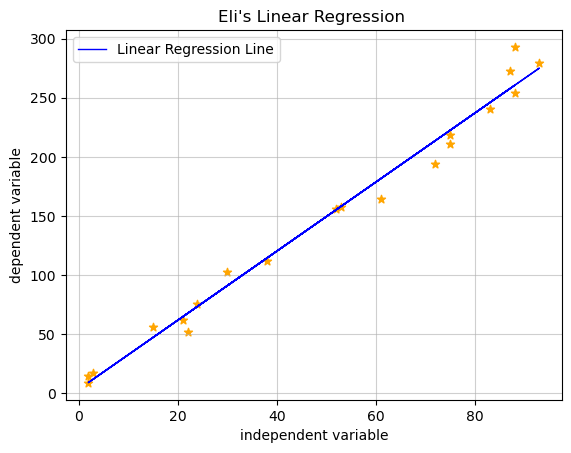

In [10]:
# Compare predictions with actual values
# y_pred = np.dot(X, theta)


# Plot the data and regression line
# You need to use scatter chart to Visualize the input dataset X & y
# Your chart should plot the regression line using theta_optimal predictions 
# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid
# Please add your name to the graph title

# Your code: 

%matplotlib inline
plt.xlabel('independent variable')
plt.ylabel('dependent variable')
plt.plot(X_train, reg.predict(X_train), label="Linear Regression Line", color="blue", linewidth=1)
plt.scatter(X_train, y_train, color='orange', marker='*')
plt.title('Eli\'s Linear Regression ')
plt.grid(alpha=0.6)
plt.legend()
plt.show()

plt.show()

## **Logistic Regression Construction** 

#### **Section 1: Logistic Regression Data Preparation**

*Objective:* Prepare data for logistic regression.

Task: Write the code to:

Create synthetic data for binary classification.
Visualize the data.

#### Dataset Description

Study_hour_Data.csv - The dataset simulates a scenario where students' chances of passing a course are influenced by their study habits and class participation. It contains 200 observations and the following three columns:


**Hours of Study:**
Integer values representing the number of hours a student spends studying in a week.
Range: 0 to 9.

**Class Participation:**
Float values between 0 and 1, representing the level of engagement in class activities.
Higher values indicate greater participation.

**Passed:**
Binary target variable indicating whether the student passed the course:
1: Passed.
0: Did not pass.
Determined based on a weighted combination of Hours of Study and Class Participation (with added noise), with a threshold value of 5.

In [14]:
import pandas as pd
import glob
#read data from Pandas 

# Load dataset
# please use Study_hour_Data.csv as your target data
data = pd.read_csv(glob.glob('*')[1])

# Display basic information
print(data.info())
print(data.describe())

#Generate your training data X & y
X =  data[['Hours of Study', 'Class Participation']]#use column Hours of Study
y =  data[['Passed']]#use columns Passed

print(X, y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hours of Study       200 non-null    int64  
 1   Class Participation  200 non-null    float64
 2   Passed               200 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 4.8 KB
None
       Hours of Study  Class Participation      Passed
count      200.000000           200.000000  200.000000
mean         4.115000             0.505828    0.750000
std          2.751295             0.289315    0.434099
min          0.000000             0.009934    0.000000
25%          2.000000             0.248919    0.750000
50%          4.000000             0.492630    1.000000
75%          6.000000             0.771555    1.000000
max          9.000000             0.992191    1.000000
     Hours of Study  Class Participation
0                 8             0.486891
1             

#### **Section 2: Visualize the data**

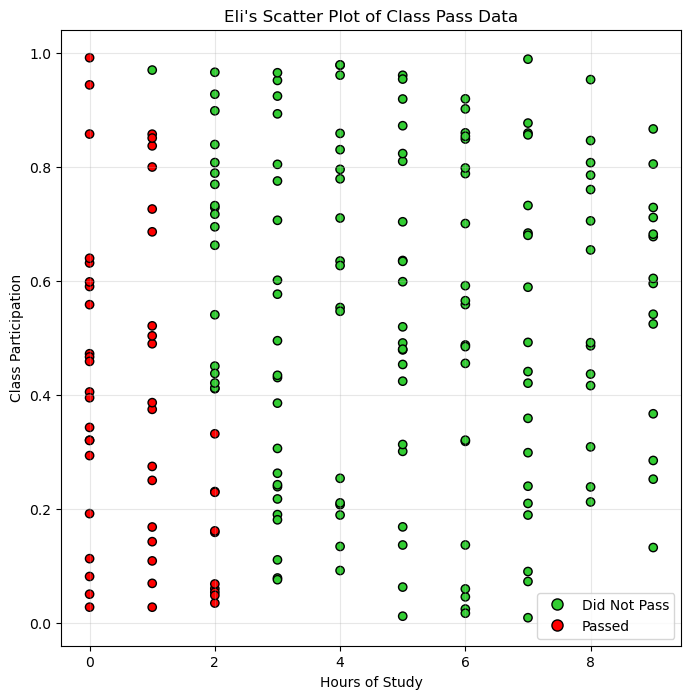

In [16]:
# Visualize the data

# You need to use scatter chart to Visualize the input dataset X & y
# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid
# Please add your name to the graph title

# I used chatGPT to help me make the graph look how I wanted it to

# Your code: 
y_numeric = np.array(y)  # Convert y to np array so it works with matplotlibs color mapping

# Create figure
fig = plt.figure(figsize=(8,8))

# Define custom colormap with brighter green
from matplotlib.colors import ListedColormap
colors = ['red', 'white', 'limegreen']  # 'limegreen' is a brighter green
cmap = ListedColormap(colors)

# Scatter plot
scatter = plt.scatter(X['Hours of Study'], X['Class Participation'], 
                       c=y_numeric, cmap=cmap, edgecolors='k')

# Labels
plt.xlabel('Hours of Study')
plt.ylabel('Class Participation')
plt.title("Eli's Scatter Plot of Class Pass Data")
plt.grid(alpha=0.3)

# Add legend manually
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Did Not Pass', 
           markerfacecolor='limegreen', markersize=8, markeredgecolor='k'),
    Line2D([0], [0], marker='o', color='w', label='Passed', 
           markerfacecolor='red', markersize=8, markeredgecolor='k')
]
plt.legend(handles=legend_elements, loc='lower right')

plt.show()

#### **Section 3: Implementing Logistic Regression**

*Objective:* Implement logistic regression.

For **Undergraduate students** (CS457): You can **choose** any of the following methods to implement it.
1. You can use any scikit-learn library.
2. Manually write cost function & gradient descent function to implement it. 

For **Graduate students** (CS557): You have to implement it by
1. Manually write cost function & gradient descent function to implement it.


Then, use the scipy.optimize library to fit the logistic regression model.

In [18]:
# Your code for logistic regression model

# Sklearn model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Prepare data
X_train, X_test, y_train, y_test = train_test_split(X,np.array(y).ravel(),train_size=0.8)

# Building the Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Review Model parameter 
model

LogisticRegression()

#### **Section 4: Evaluate the model**

*Objective:* Evaluate the model with the fitted data.

Task: build the Predict function, and Calculate accuracy.

In [20]:
model.predict_proba(X_test)

array([[6.27745414e-03, 9.93722546e-01],
       [7.78271764e-01, 2.21728236e-01],
       [8.67986856e-01, 1.32013144e-01],
       [7.06042611e-02, 9.29395739e-01],
       [1.65270340e-08, 9.99999983e-01],
       [2.01389043e-02, 9.79861096e-01],
       [2.81607562e-02, 9.71839244e-01],
       [9.85129590e-01, 1.48704097e-02],
       [2.14605750e-01, 7.85394250e-01],
       [6.82446152e-02, 9.31755385e-01],
       [7.78125835e-03, 9.92218742e-01],
       [7.56558347e-04, 9.99243442e-01],
       [2.44225739e-07, 9.99999756e-01],
       [3.46519767e-08, 9.99999965e-01],
       [9.89505153e-01, 1.04948469e-02],
       [5.65776582e-01, 4.34223418e-01],
       [1.28194052e-08, 9.99999987e-01],
       [6.82165500e-03, 9.93178345e-01],
       [1.75451043e-03, 9.98245490e-01],
       [9.94021043e-01, 5.97895656e-03],
       [3.53323053e-07, 9.99999647e-01],
       [9.08682771e-01, 9.13172288e-02],
       [5.10028712e-01, 4.89971288e-01],
       [2.33177197e-01, 7.66822803e-01],
       [1.699859

In [21]:
# Calculate accuracy

print('test x:', X_test, '\n\nprobabilities:\n', model.predict_proba(X_test))
model.predict_proba(X_test)
accuracy = model.score(X_test, y_test) 
print("\nAccuracy:", accuracy * 100, "%")

test x:      Hours of Study  Class Participation
101               4             0.254467
109               1             0.851324
189               1             0.504373
170               3             0.243174
67                9             0.542281
116               3             0.965826
177               3             0.775949
113               0             0.590881
9                 2             0.899076
66                3             0.263366
24                4             0.134919
121               5             0.063681
46                8             0.417091
17                9             0.133029
194               0             0.395795
54                2             0.035627
168               9             0.682706
6                 4             0.208207
20                4             0.961642
68                0             0.082265
142               8             0.212956
148               1             0.275313
19                2             0.159736
162     

### **Section 5: Visualizing Logistic Regression Fit**

*Objective:* Plot the logistic regression fit with the original data.

Task: Plot the sigmoid curve over the range of input features.

In [23]:
# Plot the data and regression line
# You need to use scatter chart to Visualize the input dataset X & y
# Your chart should plot the regression line using theta_optimal predictions 
# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid
# Please add your name to the graph title

# Your code: 

# Logistic regression curve
w_study = model.coef_[0][X.columns.get_loc("Hours of Study")]
w_participation = model.coef_[0][X.columns.get_loc('Class Participation')]
b = model.intercept_[0]

print(w_study)
print(w_participation)
print(b)
print(X["Hours of Study"].max())

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate smooth x-values for each feature's sigmoid curve
study_range = np.linspace(X["Hours of Study"].min(), X["Hours of Study"].max(), 300)
participation_range = np.linspace(X["Class Participation"].min(), X["Class Participation"].max(), 300)

# Compute logistic regression curves
sigmoid_study = sigmoid(w_study * study_range + b)
sigmoid_participation = sigmoid(w_participation * participation_range + b)

print(sigmoid_participation)


2.466620934706073
1.8090503323338543
-5.26233297677688
9
[0.00524948 0.00528061 0.00531192 0.00534341 0.00537509 0.00540696
 0.00543901 0.00547125 0.00550368 0.00553631 0.00556913 0.00560214
 0.00563534 0.00566874 0.00570234 0.00573613 0.00577013 0.00580432
 0.00583872 0.00587331 0.00590812 0.00594312 0.00597834 0.00601376
 0.00604939 0.00608522 0.00612127 0.00615754 0.00619401 0.0062307
 0.00626761 0.00630473 0.00634208 0.00637964 0.00641742 0.00645543
 0.00649365 0.00653211 0.00657079 0.0066097  0.00664883 0.0066882
 0.0067278  0.00676763 0.00680769 0.00684799 0.00688853 0.00692931
 0.00697032 0.00701158 0.00705308 0.00709482 0.00713681 0.00717904
 0.00722153 0.00726426 0.00730724 0.00735048 0.00739397 0.00743771
 0.00748172 0.00752598 0.0075705  0.00761528 0.00766032 0.00770563
 0.00775121 0.00779705 0.00784316 0.00788954 0.00793619 0.00798312
 0.00803032 0.0080778  0.00812556 0.0081736  0.00822192 0.00827052
 0.00831941 0.00836859 0.00841805 0.0084678  0.00851784 0.00856818
 0.0086

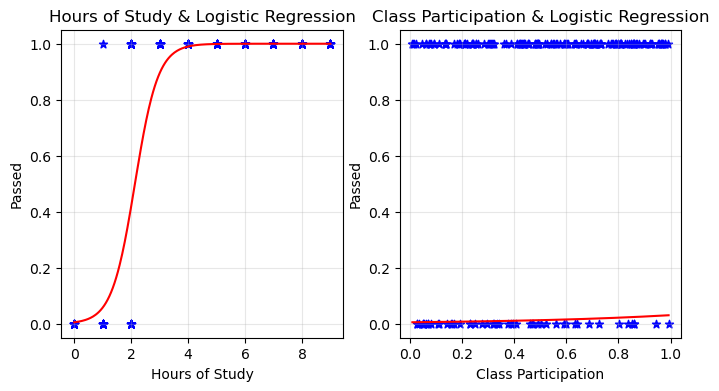

In [52]:


# Create figures
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Scatter plot for Hours of Study vs Passed
ax1.scatter(X["Hours of Study"], np.array(y), c="blue", marker="*")
ax1.plot(study_range, sigmoid_study, color="red", label="Logistic Regression Curve")

# Scatter plot for Class Participation vs Passed
ax2.scatter(X["Class Participation"], np.array(y), c="blue", marker="*")
ax2.plot(participation_range, sigmoid_participation, color="red", label="Logistic Regression Curve")


# Labels
ax1.set_xlabel('Hours of Study')
ax1.set_ylabel('Passed')
ax1.set_title("Hours of Study & Logistic Regression")
ax1.grid(alpha=0.3)

ax2.set_xlabel('Class Participation')
ax2.set_ylabel('Passed')
ax2.set_title("Class Participation & Logistic Regression")
ax2.grid(alpha=0.3)

plt.show()

# we can see from the graphs that class participation has very little to do with the passing of the student
# this suggests that hours of study is the main contriubtor to students passing the class
# normalizing the data beforehand would help with the effect each parameter has on the regression 